In [1]:
# %matplotlib notebook
from matplotlib import pyplot as plt
from input_encoding.population_coding.utils import gaussian, gen_population_coding
from sklearn import datasets
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from som import SOM


In [2]:
iris = load_iris()
X = iris.data
y = iris.target
X.shape

(150, 4)

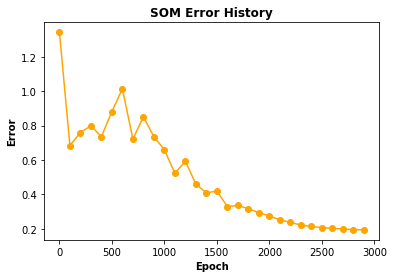

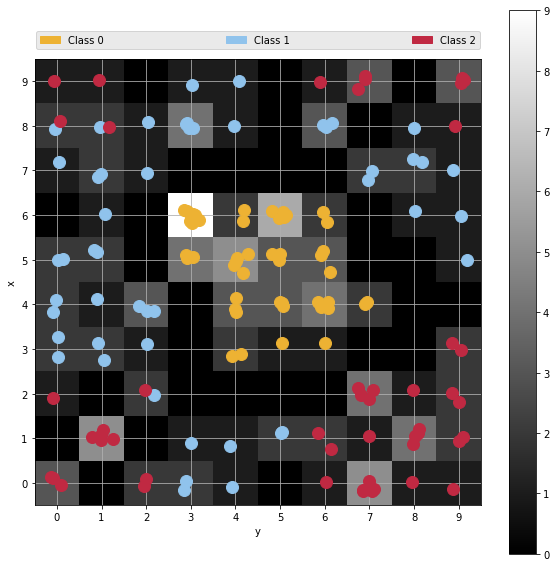

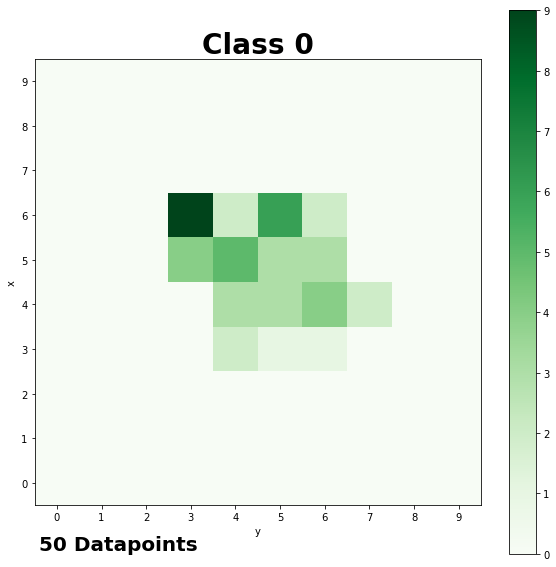

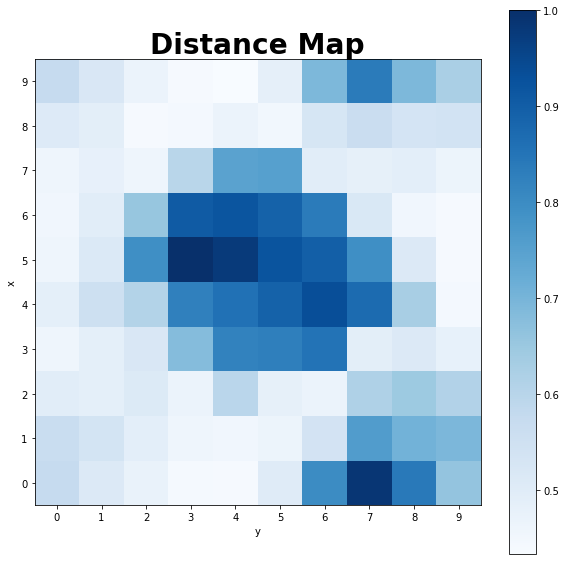

Calculating neuron indices for all data points...
Winner neuron of given data point: [1, 9]
Labels of neighboring datapoints:  [2 2]
Old shape of the data: (50, 4)
New shape of the data: (50, 10, 10)


C:\Users\ehajizad\lava-nc\som\som\__init__.py:155: RuntimeWarning: overflow encountered in exp
  return (dotprod / (np.exp(dotprod.max()) + 1e-8)).reshape(data.shape[0], self.x, self.y)


In [5]:
data = X
targets = y  

som = SOM(10, 10)  # initialize a 10 by 10 SOM
som.fit(data, 3000, save_e=True, interval=100, verbose=False)  # fit the SOM for 10000 epochs, save the error every 100 steps
som.plot_error_history()  # plot the training error history

# now visualize the learned representation with the class labels
som.plot_point_map(data, targets, ['Class 0', 'Class 1', 'Class 2'])
som.plot_class_density(data, targets, t=0, name='Class 0', colormap='Greens')
som.plot_distance_map(colormap='Blues')  # plot the distance map after training

# predicting the class of a new, unknown datapoint
datapoint = data[100,:]
print("Labels of neighboring datapoints: ", som.get_neighbors(datapoint, data, targets, d=0))

# transform data into the SOM space
newdata = data[100:150,:]
transformed = som.transform(newdata)
print("Old shape of the data:", newdata.shape)
print("New shape of the data:", transformed.shape)

In [3]:
# Create population coding of the Iris data
x_min, x_max = np.min(X, 0), np.max(X, 0)
n_neuron_per_dim = 20
sigma_ratio = 0.05
u_data = np.zeros(shape=X.shape+(n_neuron_per_dim,))
for i in range(X.shape[0]):
    x = X[i,:]
    u_data[i,:,:] = gen_population_coding(x, x_min, x_max, n_neuron_per_dim, sigma_ratio)

u_data_flat = u_data.reshape((u_data.shape[0], u_data.shape[1]*u_data.shape[2] ))
u_data_flat

array([[0.  , 0.  , 0.06, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.07, 0.47, ..., 0.  , 0.  , 0.  ],
       [0.08, 0.5 , 0.99, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.12, 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.91, 0.83, 0.25],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

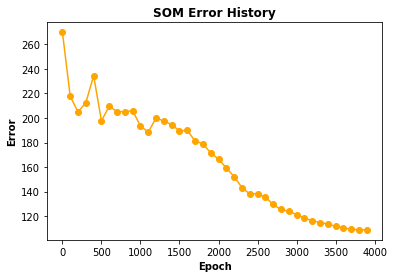

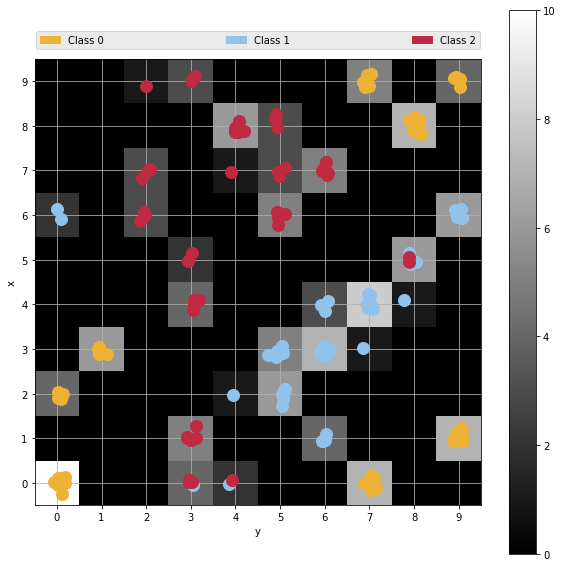

In [4]:
data = 100*u_data_flat
targets = y  

som = SOM(10, 10, bmu_metric='dot_product', init='random')  # initialize a 10 by 10 SOM
som.fit(data, 4000, save_e=True, interval=100, verbose=False)  # fit the SOM for 10000 epochs, save the error every 100 steps
som.plot_error_history()  # plot the training error history

# now visualize the learned representation with the class labels
som.plot_point_map(data, targets, ['Class 0', 'Class 1', 'Class 2'])